# Clause Main Types Analysis

In [1]:
from scripts.imports import *
nt_clause_df = pd.read_csv(
    paths['clause_dataset'],
    index_col='node',
    low_memory=False
)

# bind clauses with time and without together
cl_df = pd.concat([df, nt_clause_df], 0)

# designate some additional parameters for a clause to be "main"

non_main = [
    'InfC', 'InfA', 'Reop', 
    'Voct', 'CPen', 'Ellp', 
    'MSyn',
]

main_df = cl_df[
    (cl_df.cl_rela == 'Main')
    & (~cl_df.cl_type2.isin(non_main))
]

out = Exporter(
    paths['outdir'],
    'clause',
)

main_df.shape

(58874, 71)

In [55]:
# give number of WayH and WQtH clauses

out.number(
    main_df[(main_df.cl_type2 == 'WayH') & (main_df.has_time == 1)].shape[0],
    'n_WayH',
)

'163'

In [58]:
out.number(
    main_df[(main_df.cl_type2 == 'WQtH') & (main_df.has_time == 1)].shape[0],
    'n_WQtH',
)

'37'

# Basic Statistics for presence of TA

In [2]:
has_ct = cl_df.has_time.value_counts()

has_ct.index = ['no time', 'time']

has_ct

no time    84473
time        3648
Name: has_time, dtype: int64

In [3]:
has_pr = has_ct / has_ct.sum()

has_pr

no time    0.958602
time       0.041398
Name: has_time, dtype: float64

In [4]:
out.number(
    has_ct['no time'],
    'n_notimecl'
)

'84,473'

In [5]:
out.number(
    has_pr['time'] * 100,
    'perc_timecl'
)

'4'

## Number of Main Clauses

In [6]:
main_ct = main_df.has_time.value_counts()
main_ct.index = ['no time', 'time']
main_pr = main_ct / main_ct.sum()

main_cp = join_ct_pr(main_ct, main_pr)

out.table(
    main_cp,
    'main_cp',
    caption='Clause Counts by Presence of Time Adverbial (main only)'
)

main_cp

,count,percent
no time,56172,95%
time,2702,5%


In [7]:
out.number(
    main_ct['time'],
    'n_time_main',
)

'2,702'

In [8]:
out.number(
    main_ct.sum(),
    'n_main',
)

'58,874'

In [9]:
out.number(
    cl_df.shape[0],
    'n_all_cls'
)

'88,121'

In [10]:
n_covered = main_ct.sum()/cl_df.shape[0]

out.number(
    n_covered*100,
    'n_covered'
)

'67'

# Association Tests

We test for associations by time tag and clause type. The tag allows us to compare clauses with and without time to look for statistical associations.

## By verbform

In [11]:
verb_ct = pivot_ct(
    main_df,
    'has_time',
    'verbform',
)

verb_ct = verb_ct\
    .set_axis(['no', 'yes'], 0)\
    .rename_axis(columns='verb form')\
    .rename_axis(index='has time')\

verb_pr = verb_ct.div(verb_ct.sum(1), 0)

In [12]:
out.table(
    verb_ct,
    'main_verb_ct',
    caption='Frequencies of Main Clauses by Presence of Time'
)

verb form,wayq,yqtl,Ø,qtl,wqtl,impv,ptcp,cohoF,jussF
has time,,,,,,,,,
no,14064,10926,9299,8373,5987,4204,2466,482,371
yes,702,748,187,575,262,83,110,23,12


In [13]:
out.table(
    verb_pr.mul(100).round(2).astype(int).astype(str)+'%',
    'main_verb_pr',
    caption='Percent of Clause Group with Verb Form'
)



verb form,wayq,yqtl,Ø,qtl,wqtl,impv,ptcp,cohoF,jussF
has time,,,,,,,,,
no,25%,19%,16%,14%,10%,7%,4%,0%,0%
yes,25%,27%,6%,21%,9%,3%,4%,0%,0%


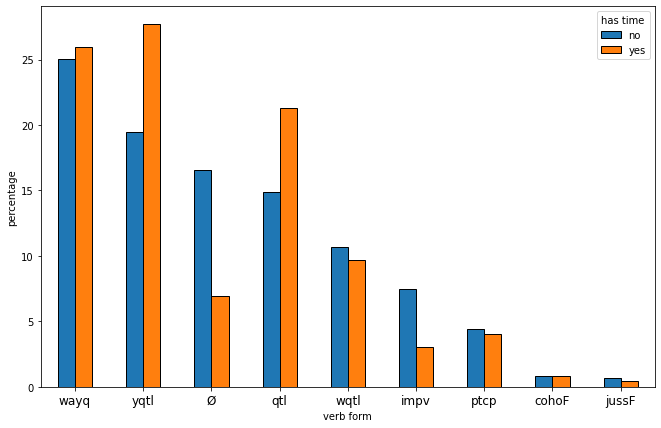

In [14]:
fig, ax = plt.subplots(figsize=(11, 7))
verb_pr.mul(100).T.plot(kind='bar', ax=ax, edgecolor='black')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, size=12)
ax.set_ylabel('percentage')
out.plot(
    'bar_DP_allverbs',
)

In [15]:
verb_dp = sig.apply_deltaP(verb_ct, 0, 1)

verb_dp

verb form,wayq,yqtl,Ø,qtl,wqtl,impv,ptcp,cohoF,jussF
has time,,,,,,,,,
no,-0.009434,-0.082322,0.096337,-0.063745,0.009618,0.044124,0.00319,0.000069,0.002164
yes,0.009434,0.082322,-0.096337,0.063745,-0.009618,-0.044124,-0.00319,-0.000069,-0.002164


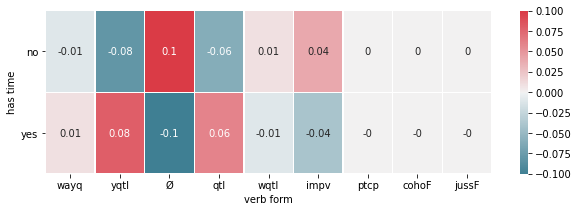

In [16]:
fig, ax = plt.subplots(figsize=(10, 3))
heatmap(verb_dp.round(2), ax=ax, annot=True, square=False)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
out.plot(
    'heat_dP_allverbs',
)

In [17]:
out.number(
    verb_dp.loc['yes']['yqtl']*100,
    'yestime_yqtl_dp',
)

'8'

In [18]:
out.number(
    verb_dp.loc['yes']['qtl']*100,
    'yestime_qtl_dp',
)

'6'

In [19]:
out.number(
    verb_dp.loc['yes'].abs()['Ø']*100,
    'yestime_Ø_dp',
)

'10'

In [20]:
out.number(
    verb_dp.loc['yes'].abs()['impv']*100,
    'yestime_impv_dp',
)

'4'

# By Rela

In [21]:
rela_ct = pivot_ct(
    cl_df,
    'has_time',
    'cl_rela',
)

rela_ct.index = ['Øtime', 'time']

rela_pr = rela_ct.div(rela_ct.sum(1), 0).round(2)

rela_ct

cl_rela,Main,SubAdv,SubMod,SubArg
Øtime,62204,13353,6685,2231
time,3055,369,168,56


In [22]:
rela_pr

cl_rela,Main,SubAdv,SubMod,SubArg
Øtime,0.74,0.16,0.08,0.03
time,0.84,0.10,0.05,0.02


In [23]:
rela_dp = sig.apply_deltaP(rela_ct, 0, 1)

rela_dp

cl_rela,Main,SubAdv,SubMod,SubArg
Øtime,-0.101068,0.056923,0.033085,0.01106
time,0.101068,-0.056923,-0.033085,-0.01106


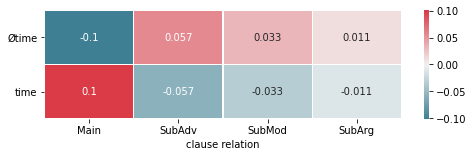

In [24]:
fig, ax = plt.subplots(figsize=(8, 2))
heatmap(rela_dp, ax=ax, annot=True, square=False)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xlabel('clause relation')
plt.show()

# By Type (main only)

In [25]:
htime_ct = pivot_ct(
    main_df,
    'has_time',
    'cl_type2',
)

htime_ct

cl_type2,NmCl,Way0,WayX,WQt0,xYq0,ZIm0,Ptcp,WxY0,xQt0,WXQt,...,WxYX,xIm0,WYqX,WxI0,WXIm,ZImX,XPos,XImp,WImX,xImX
has_time,,,,,,,,,,,,,,,,,,,,,
0,8435,8200,5360,4529,3161,2909,2438,2048,1581,1282,...,301,243,232,78,48,34,24,11,3,1
1,167,266,273,170,298,51,109,141,123,48,...,34,11,6,5,2,2,1,1,0,0


In [26]:
# run a fishers test
htime_dp = sig.apply_deltaP(htime_ct, 0, 1)
htime_dp

cl_type2,NmCl,Way0,WayX,WQt0,xYq0,ZIm0,Ptcp,WxY0,xQt0,WXQt,...,WxYX,xIm0,WYqX,WxI0,WXIm,ZImX,XPos,XImp,WImX,xImX
has_time,,,,,,,,,,,,,,,,,,,,,
0,0.088358,0.047535,-0.005615,0.017711,-0.054015,0.032912,0.003062,-0.015724,-0.017376,0.005058,...,-0.007225,0.000255,0.00191,-0.000462,0.000114,-0.000135,0.000057,-0.000174,0.000053,0.000018
1,-0.088358,-0.047535,0.005615,-0.017711,0.054015,-0.032912,-0.003062,0.015724,0.017376,-0.005058,...,0.007225,-0.000255,-0.00191,0.000462,-0.000114,0.000135,-0.000057,0.000174,-0.000053,-0.000018


In [27]:
# top assocs with time
htime_dp.loc[1].sort_values(ascending=False).head(25)

cl_type2
xYq0    0.054015
WayH    0.051353
xQtX    0.035153
xYqX    0.034391
WxQX    0.019458
WxQ0    0.018113
xQt0    0.017376
WxY0    0.015724
WQtH    0.007783
WxYX    0.007225
WayX    0.005615
WxI0    0.000462
WQtX    0.000310
XImp    0.000174
ZImX    0.000135
xImX   -0.000018
WImX   -0.000053
XPos   -0.000057
WXIm   -0.000114
xIm0   -0.000255
WYqX   -0.001910
Ptcp   -0.003062
XYqt   -0.003606
WXYq   -0.004229
ZYqX   -0.004485
Name: 1, dtype: float64

In [28]:
# top negative assocs with time
htime_dp.loc[1].sort_values().head(25)

cl_type2
NmCl   -0.088358
Way0   -0.047535
ZIm0   -0.032912
WQt0   -0.017711
WIm0   -0.011542
WYq0   -0.011306
AjCl   -0.007922
ZQtX   -0.007793
XQtl   -0.007237
ZQt0   -0.006288
ZYq0   -0.005836
WXQt   -0.005058
ZYqX   -0.004485
WXYq   -0.004229
XYqt   -0.003606
Ptcp   -0.003062
WYqX   -0.001910
xIm0   -0.000255
WXIm   -0.000114
XPos   -0.000057
WImX   -0.000053
xImX   -0.000018
ZImX    0.000135
XImp    0.000174
WQtX    0.000310
Name: 1, dtype: float64

# With Subject

I've noticed a lot of `X` in the attractions above. Let's see if there is a prediction for 
subject with time.

In [29]:
cl_df.has_subj.value_counts()

1    45802
0    42319
Name: has_subj, dtype: int64

In [30]:
subj_ct = pivot_ct(
    cl_df,
    'has_time',
    'has_subj',
)

subj_pr = subj_ct.div(subj_ct.sum(1), 0)

subj_ct

has_subj,1,0
has_time,,
0,44290,40183
1,1512,2136


In [31]:
subj_pr

has_subj,1,0
has_time,,
0,0.524310,0.475690
1,0.414474,0.585526


In [32]:
subj_dp = sig.apply_deltaP(subj_ct, 0, 1)

subj_dp

has_subj,1,0
has_time,,
0,0.109836,-0.109836
1,-0.109836,0.109836


# By Function

In [33]:
main_df.function.value_counts()

simultaneous                                 1360
atelic_ext                                    443
anterior_dur                                  354
posterior                                     202
posterior_dur                                  42
begin_to_end                                   42
habitual                                       39
purposive_ext                                  27
simultaneous + atelic_ext                      21
anterior_dur_past?                             17
multi_simuls                                   15
anterior_dur_purposive                         15
regular_recurrence                             15
anterior                                       13
telic_ext                                      10
dur_to_end                                      5
begin_to_end_habitual                           5
dist_fut                                        5
habitual?                                       4
anterior_limitive                               4


In [34]:
function_ct = pivot_ct(
    main_df,
    'function',
    'verbform',
)

# select primary functions of interest
select = [
    'simultaneous', 'atelic_ext', 'anterior_dur',
    'posterior', 'posterior_dur', 'begin_to_end',
    'habitual', 'telic_ext', 'anterior', 
]

function_ct = function_ct.loc[select]

print(function_ct.shape)

(9, 9)


In [35]:
out.table(
    function_ct,
    'verbfunct_ct',
    caption='Collocation Counts of Time Adverbial Function with Verb Type'
)

verbform,yqtl,wayq,qtl,wqtl,Ø,ptcp,impv,cohoF,jussF
function,,,,,,,,,
simultaneous,362,343,304,131,100,56,47,10,7
atelic_ext,103,154,98,44,18,13,10,2,1
anterior_dur,147,53,37,49,29,19,9,8,3
posterior,58,85,50,3,5,1,0,0,0
posterior_dur,1,4,27,0,5,5,0,0,0
begin_to_end,11,9,6,1,4,5,5,0,1
habitual,16,4,3,6,5,2,3,0,0
telic_ext,3,4,2,1,0,0,0,0,0
anterior,6,1,3,0,2,1,0,0,0


In [36]:
function_ct.size # N-datapoints

81

In [37]:
# fishers
function_fs, function_odds = sig.apply_fishers(function_ct, 0, 1)
function_dp = sig.apply_deltaP(function_ct, 0, 1)
function_dp2 = sig.apply_deltaP(function_ct.T, 0, 1)

df_highlighter(function_fs, rule='fishers')

,yqtl,wayq,qtl,wqtl,Ø,ptcp,impv,cohoF,jussF
simultaneous,-1.256799,-0.660565,0.934850,0.167522,0.761915,0.036437,0.908597,-0.084812,-0.000000
atelic_ext,-1.981224,4.887235,0.216071,0.184563,-1.921604,-0.634516,-0.357826,-0.253955,-0.152108
anterior_dur,8.123868,-7.135320,-7.665332,2.518538,0.601069,0.719198,-0.133144,2.406688,0.630023
posterior,0.060139,6.388548,0.681621,-5.438726,-2.096173,-2.582142,-2.438312,-0.398161,-0.210928
posterior_dur,-4.732273,-1.914102,8.869219,-1.537249,0.700048,1.584037,-0.197363,0.000000,0.000000
begin_to_end,-0.063586,-0.224574,-0.465581,-0.754601,0.279880,1.584037,2.147601,0.000000,0.735157
habitual,0.981125,-1.587664,-1.341114,0.586590,0.741179,0.172799,0.974106,0.000000,0.000000
telic_ext,-0.000000,0.522009,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
anterior,0.673877,-0.689600,0.128342,-0.203932,0.667105,0.378545,0.000000,0.000000,0.000000


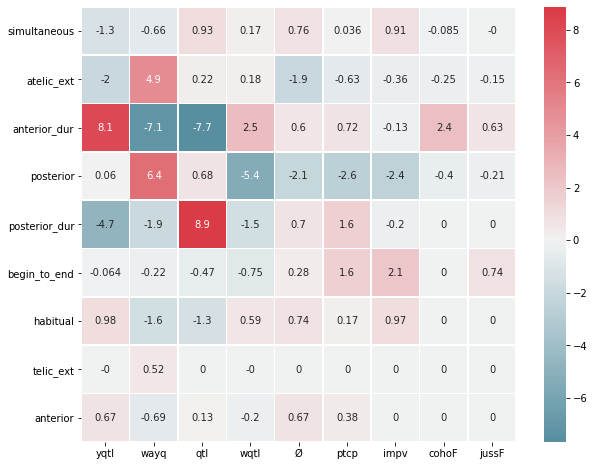

In [38]:
fig, ax = plt.subplots(figsize=(10, 8))
heatmap(function_fs.head(20), ax=ax, annot=True)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
out.plot(
    'heat_fs_timeverb'
)

In [39]:
ts.show(main_df[
    (main_df.verbform == 'yqtl')
    & (main_df.function == 'anterior_dur')
], extra=['cl_type'])

showing 25 of 147


,verse,clause,verb_utf8,cl_type
node,,,,
428066,Genesis 6:3,לֹֽא־יָדֹ֨ון רוּחִ֤י בָֽאָדָם֙ לְעֹלָ֔ם,דון,xYqX
438414,Leviticus 7:15,לֹֽא־יַנִּ֥יחַ מִמֶּ֖נּוּ עַד־בֹּֽקֶר׃,נוח,xYq0
439421,Leviticus 15:10,וְכָל־יִטְמָ֖א עַד־הָעָ֑רֶב,טמא,WXYq
440605,Leviticus 25:40,עַד־שְׁנַ֥ת הַיֹּבֵ֖ל יַעֲבֹ֥ד עִמָּֽךְ׃,עבד,xYq0
443761,Numbers 24:22,עַד־מָ֖ה אַשּׁ֥וּר תִּשְׁבֶּֽךָּ׃,שׁבה,XYqt
454198,1_Samuel 2:30,בֵּֽיתְךָ֙ וּבֵ֣ית אָבִ֔יךָ יִתְהַלְּכ֥וּ לְפָנַ֖י עַד־עֹולָ֑ם,הלך,XYqt
458689,2_Samuel 7:16,כִּֽסְאֲךָ֔ יִהְיֶ֥ה נָכֹ֖ון עַד־עֹולָֽם׃,היה,XYqt
465552,2_Kings 5:27,וְצָרַ֤עַת נַֽעֲמָן֙ תִּֽדְבַּק־בְּךָ֔ וּֽבְזַרְעֲךָ לְעֹולָ֑ם,דבק,WXYq
470740,Isaiah 34:10,לְעֹולָ֖ם יַעֲלֶ֣ה עֲשָׁנָ֑הּ,עלה,xYqX


In [40]:
function_dp

verbform,yqtl,wayq,qtl,wqtl,Ø,ptcp,impv,cohoF,jussF
function,,,,,,,,,
simultaneous,-0.035134,-0.022030,0.026149,0.005494,0.014141,0.001002,0.010978,-0.001381,0.000780
atelic_ext,-0.060414,0.103692,0.011714,0.006694,-0.032113,-0.013817,-0.008464,-0.004215,-0.003077
anterior_dur,0.154910,-0.131082,-0.124676,0.051947,0.017300,0.015086,-0.004795,0.017020,0.004290
posterior,0.005322,0.172420,0.039101,-0.085887,-0.046025,-0.038905,-0.032132,-0.008684,-0.005211
posterior_dur,-0.262833,-0.169886,0.438635,-0.095412,0.052868,0.079665,-0.030045,-0.008120,-0.004872
begin_to_end,-0.020677,-0.048808,-0.069892,-0.071197,0.028653,0.079665,0.091033,-0.008120,0.019343
habitual,0.130046,-0.162237,-0.136783,0.060983,0.062106,0.010731,0.048132,-0.008110,-0.004866
telic_ext,0.017836,0.138277,-0.011623,0.006212,-0.067335,-0.040882,-0.029659,-0.008016,-0.004810
anterior,0.180238,-0.186319,0.019293,-0.094302,0.087233,0.036393,-0.029695,-0.008026,-0.004815


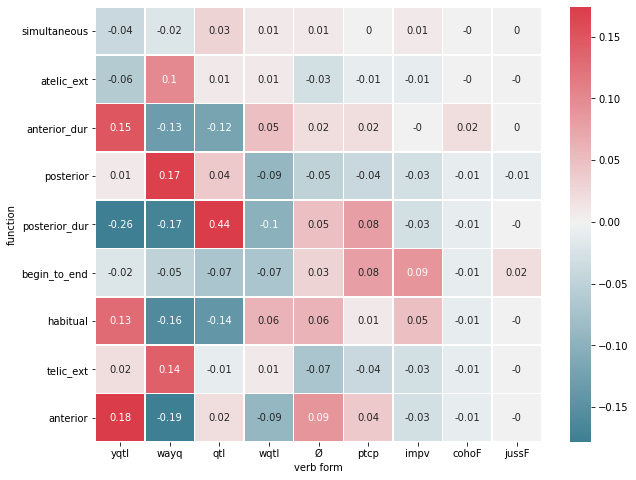

In [41]:
fig, ax = plt.subplots(figsize=(10, 8))
heatmap(function_dp.head(20).round(2), ax=ax, square=False, robust=True, annot=True)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xlabel('verb form')
out.plot(
    'heat_dp_timeverb'
)

## TA Modifier / Verb Collocations

In [42]:
main_df.columns

Index(['verse', 'book', 'booksuper', 'canon_part', 'period', 'times_etcbc',
       'times_utf8', 'times_utf8d', 'times_POS', 'TA Heads', 'function',
       'quality', 'name', 'text', 'n_times', 'lex_token', 'is_advb', 'tense',
       'firstw', 'genre', 'domain', 'gendom', 'clause', 'sentence', 'cl_rela',
       'cl_type', 'cl_kind', 'verb', 'verb_etcbc', 'verb_utf8', 'verb_text',
       'verbform', 'verb_stem', 'cl_args', 'has_objc', 'has_cmpl', 'has_subj',
       'has_oc', 'Time Position', 'cl_type2', 'cl_clust50', 'cl_clust10',
       'verbtense', 'vt_order', 'PP', 'front_etcbc', 'front', 'tag',
       'unmodified', 'has_time', 'APPO', 'DEF', 'ORDN', 'ØPP', 'GP', 'QUANT',
       'PL', 'NUM', 'PARA', 'DEMON', 'demon_type', 'ADJV', 'TIMEAPPO', 'SPEC',
       'SFX3', 'SFX', 'DU', 'SFX1', 'SFX2', 'ADVB', 'CARDC'],
      dtype='object')

In [43]:
select_modis = ['DEF', 'PL', 'NUM', 'SFX', 'DEMON', 'GP', 'ORDN', 'QUANT']

In [44]:
time_df = main_df[
    (main_df.has_time == 1)
    & (main_df.n_times == 1)
].copy()
time_df[select_modis] = time_df[select_modis].astype(int)

In [45]:
verbmod_ct = pivot_ct(
    time_df,
    select_modis,
    'verbform',
)

In [46]:
verbmod_ct

verbform                            yqtl  wayq  qtl  wqtl   Ø  ptcp  impv  \
DEF PL NUM SFX DEMON GP ORDN QUANT                                          
0   0  0   0   0     0  0    0       270    83  123    35  59    32    19   
1   0  0   0   0     0  0    0        82    94   60    45  39    23    32   
               1     0  0    0        79   147   63    61  12    10     1   
0   0  0   0   0     1  0    0        51    36   63    16  12     6     6   
    1  1   0   0     0  0    0        48    63   24    22   1     1     7   
    0  1   0   0     0  0    0        17    53   53    10   1     1     0   
1   0  0   0   0     0  1    0        31    44   15    18  11     2     4   
0   1  0   1   0     0  0    0        11     6   29     2   2     3     0   
1   1  0   0   1     0  0    0         6    12   13     1   7     3     0   
    0  0   0   0     0  0    1         8    14   10     0   5     3     1   
0   1  0   0   0     1  0    0         5     7   15     0   6     3     1   
                     0  0    0         7     8    9     1   7     0     0   
                     1  0    1        10     7    5     5   1     2     1   
    0  0   1   0     0  0    0        13     1    3     5   3     2     0   
1   1  0   0   0     0  0    1         5     4    2    10   3     1     0   
0   0  0   0   0     0  0    1         6     0    5     2   0     4     2   
    1  0   0   0     0  0    1         5    12    1     0   0     0     0   
1   1  0   0   0     0  0    0         5     0    1     8   1     0     1   
0   1  0   1   0     0  0    1         4     1    7     0   0     0     0   
1   1  1   0   0     0  0    0         1     5    0     0   0     0     0   
0   1  1   0   0     1  0    0         2     1    0     2   0     0     0   
    0  0   0   1     0  0    0         1     0    2     0   0     0     0   
1   0  0   0   1     0  0    1         0     0    1     0   0     1     0   
               0     1  0    0         0     1    0     0   0     0     0   
0   0  0   1   0     0  0    1         0     1    0     0   0     0     0   

verbform                            cohoF  jussF  
DEF PL NUM SFX DEMON GP ORDN QUANT                
0   0  0   0   0     0  0    0          8      4  
1   0  0   0   0     0  0    0          2      2  
               1     0  0    0          1      0  
0   0  0   0   0     1  0    0          1      3  
    1  1   0   0     0  0    0          0      1  
    0  1   0   0     0  0    0          0      0  
1   0  0   0   0     0  1    0          0      0  
0   1  0   1   0     0  0    0          2      0  
1   1  0   0   1     0  0    0          0      0  
    0  0   0   0     0  0    1          0      0  
0   1  0   0   0     1  0    0          0      1  
                     0  0    0          1      0  
                     1  0    1          0      0  
    0  0   1   0     0  0    0          2      0  
1   1  0   0   0     0  0    1          0      0  
0   0  0   0   0     0  0    1          1      0  
    1  0   0   0     0  0    1          0      0  
1   1  0   0   0     0  0    0          0      0  
0   1  0   1   0     0  0    1          1      0  
1   1  1   0   0     0  0    0          0      0  
0   1  1   0   0     1  0    0          0      0  
    0  0   0   1     0  0    0          0      0  
1   0  0   0   1     0  0    1          0      0  
               0     1  0    0          0      0  
0   0  0   1   0     0  0    1          0      0

In [47]:
# Fishers test

verbmod_fs, verbmod_odds = sig.apply_fishers(verbmod_ct, 0, 1)

verbmod_fs.index.names = verbmod_ct.index.names

verbmod_fs

yqtl       wayq       qtl      wqtl  \
DEF PL NUM SFX DEMON GP ORDN QUANT                                             
0   0  0   0   0     0  0    0      20.196441 -16.609153 -0.632164 -5.603960   
1   0  0   0   0     0  0    0      -2.567517  -0.047013 -2.223886  0.638623   
               1     0  0    0      -2.871384  10.424384 -1.563898  4.261791   
0   0  0   0   0     1  0    0      -0.209372  -1.514847  3.967975 -0.410665   
    1  1   0   0     0  0    0       0.066460   3.707273 -1.522010  0.733020   
    0  1   0   0     0  0    0      -4.756757   3.681217  6.165072 -0.511469   
1   0  0   0   0     0  1    0      -0.324256   1.970628 -2.030987  0.897567   
0   1  0   1   0     0  0    0      -0.649606  -1.938444  6.762878 -0.933272   
1   1  0   0   1     0  0    0      -1.259356   0.227126  0.897285 -0.924622   
    0  0   0   0     0  0    1      -0.534493   0.692712  0.246856 -1.739664   
0   1  0   0   0     1  0    0      -1.354551  -0.346089  2.067557 -1.551888   
                     0  0    0      -0.355557   0.000000  0.407894 -0.607281   
                     1  0    1       0.257645  -0.076961 -0.181489  0.624671   
    0  0   1   0     0  0    0       1.233449  -2.387434 -0.753938  0.678543   
1   1  0   0   0     0  0    1      -0.298661  -0.443728 -0.857636  4.085653   
0   0  0   0   0     0  0    1       0.093797  -2.407891  0.227614  0.000000   
    1  0   0   0     0  0    1       0.000000   3.635189 -0.835429 -0.608603   
1   1  0   0   0     0  0    0       0.106784  -1.765958 -0.660321  4.190818   
0   1  0   1   0     0  0    1       0.116830  -0.687715  2.027616 -0.413947   
1   1  1   0   0     0  0    0       0.000000   2.326289 -0.451835  0.000000   
0   1  1   0   0     1  0    0       0.205397   0.000000 -0.228578  1.075817   
    0  0   0   1     0  0    0      -0.000000  -0.238814  0.939733  0.000000   
1   0  0   0   1     0  0    1       0.000000   0.000000  0.422606  0.000000   
               0     1  0    0       0.000000   0.599519  0.000000  0.000000   
0   0  0   1   0     0  0    1       0.000000   0.599519  0.000000  0.000000   

                                           Ø      ptcp      impv     cohoF  \
DEF PL NUM SFX DEMON GP ORDN QUANT                                           
0   0  0   0   0     0  0    0      1.830347  0.800344 -0.048337  0.903169   
1   0  0   0   0     0  0    0      1.920383  1.341788  7.765605 -0.121995   
               1     0  0    0     -3.183819 -0.810317 -4.186062 -0.466970   
0   0  0   0   0     1  0    0     -0.113367 -0.242042  0.000000  0.000000   
    1  1   0   0     0  0    0     -4.179804 -1.887179  0.441312 -0.194634   
    0  1   0   0     0  0    0     -3.096094 -1.386517 -1.693430 -0.206347   
1   0  0   0   0     0  1    0      0.325702 -0.622612 -0.000000 -0.207176   
0   1  0   1   0     0  0    0     -0.366476  0.311466 -0.379465  1.158220   
1   1  0   0   1     0  0    0      1.576656  0.615690 -0.192853  0.000000   
    0  0   0   0     0  0    1      0.677077  0.635844  0.000000  0.000000   
0   1  0   0   0     1  0    0      1.309073  0.701191  0.000000  0.000000   
                     0  0    0      2.141761 -0.191879 -0.204676  0.632131   
                     1  0    1     -0.141683  0.441930 -0.000000  0.000000   
    0  0   1   0     0  0    0      0.339616  0.479671  0.000000  1.668270   
1   1  0   0   0     0  0    1      0.379194  0.000000  0.000000  0.000000   
0   0  0   0   0     0  0    1     -0.405506  2.123136  0.890066  0.828805   
    1  0   0   0     0  0    1     -0.197943  0.000000  0.000000  0.000000   
1   1  0   0   0     0  0    0      0.000000  0.000000  0.396756  0.000000   
0   1  0   1   0     0  0    1     -0.209454  0.000000  0.000000  1.004570   
1   1  1   0   0     0  0    0      0.000000  0.000000  0.000000  0.000000   
0   1  1   0   0     1  0    0      0.000000  0.000000  0.000000  0.000000   
    0  0   0   1     0  0    0      0.000000  0.000000  0.000000  0.000000   
1   0  0

[Text(0.5, 0, 'yqtl'),
 Text(1.5, 0, 'wayq'),
 Text(2.5, 0, 'qtl'),
 Text(3.5, 0, 'wqtl'),
 Text(4.5, 0, 'Ø'),
 Text(5.5, 0, 'ptcp'),
 Text(6.5, 0, 'impv'),
 Text(7.5, 0, 'cohoF'),
 Text(8.5, 0, 'jussF')]

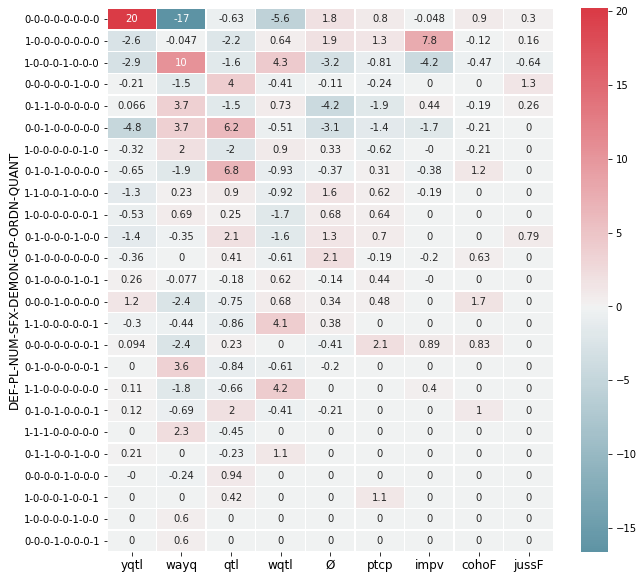

In [48]:
fig, ax = plt.subplots(figsize=(10, 10))
heatmap(verbmod_fs, square=False, annot=True)
ax.set_ylabel(ax.get_ylabel(), size=12)
ax.set_xticklabels(ax.get_xticklabels(), size=12)

In [49]:
# DeltaP test

verbmod_dp = sig.apply_deltaP(verbmod_ct, 0, 1)
verbmod_dp2 = sig.apply_deltaP(verbmod_ct.T, 0, 1)

verbmod_dp

verbform                                yqtl      wayq       qtl      wqtl  \
DEF PL NUM SFX DEMON GP ORDN QUANT                                           
0   0  0   0   0     0  0    0      0.200071 -0.163801 -0.023029 -0.063361   
1   0  0   0   0     0  0    0     -0.075121 -0.004096 -0.062914  0.020079   
               1     0  0    0     -0.081017  0.167899 -0.050736  0.072644   
0   0  0   0   0     1  0    0     -0.018135 -0.071732  0.123556 -0.021084   
    1  1   0   0     0  0    0      0.008471  0.135245 -0.072601  0.032142   
    0  1   0   0     0  0    0     -0.162835  0.149589  0.192237 -0.029435   
1   0  0   0   0     0  1    0     -0.033291  0.106091 -0.096276  0.044487   
0   1  0   1   0     0  0    0     -0.081424 -0.145735  0.323498 -0.067025   
1   1  0   0   1     0  0    0     -0.139139  0.034861  0.100053 -0.079433   
    0  0   0   0     0  0    1     -0.085902  0.091570  0.033241 -0.103625   
0   1  0   0   0     1  0    0     -0.150363 -0.068345  0.186474 -0.103492   
                     0  0    0     -0.068372 -0.009169  0.062358 -0.072544   
                     1  0    1      0.043600 -0.025998 -0.050599  0.060229   
    0  0   1   0     0  0    0      0.170805 -0.219654 -0.109110  0.071438   
1   1  0   0   0     0  0    1     -0.080390 -0.092435 -0.132622  0.301313   
0   0  0   0   0     0  0    1      0.020626 -0.253593  0.039096 -0.001860   
    1  0   0   0     0  0    1     -0.001783  0.418356 -0.156860 -0.102618   
1   1  0   0   0     0  0    0      0.033175 -0.253165 -0.149736  0.400844   
0   1  0   1   0     0  0    1      0.028299 -0.175500  0.329022 -0.102402   
1   1  1   0   0     0  0    0     -0.113165  0.583333 -0.211765 -0.102101   
0   1  1   0   0     1  0    0      0.120706 -0.051575 -0.211676  0.298782   
    0  0   0   1     0  0    0      0.053854 -0.251783  0.456008 -0.101972   
1   0  0   0   1     0  0    1     -0.279782 -0.251678  0.289010 -0.101930   
               0     1  0    0     -0.279665  0.748847 -0.211321 -0.101887   
0   0  0   1   0     0  0    1     -0.279665  0.748847 -0.211321 -0.101887   

verbform                                   Ø      ptcp      impv     cohoF  \
DEF PL NUM SFX DEMON GP ORDN QUANT                                           
0   0  0   0   0     0  0    0      0.029887  0.013474 -0.001929  0.006363   
1   0  0   0   0     0  0    0      0.037631  0.023815  0.063008 -0.003193   
               1     0  0    0     -0.046443 -0.016503 -0.034106 -0.006273   
0   0  0   0   0     1  0    0     -0.010225 -0.010587 -0.000550 -0.003057   
    1  1   0   0     0  0    0     -0.070172 -0.037275  0.011272 -0.008562   
    0  1   0   0     0  0    0     -0.067670 -0.035240 -0.033319 -0.008441   
1   0  0   0   0     0  1    0      0.017677 -0.026017  0.000598 -0.008403   
0   1  0   1   0     0  0    0     -0.035708  0.014219 -0.032175  0.029071   
1   1  0   0   1     0  0    0      0.097127  0.031326 -0.031997 -0.008106   
    0  0   0   0     0  0    1      0.051589  0.033085 -0.007166 -0.008102   
0   1  0   0   0     1  0    0      0.088048  0.038913 -0.005200 -0.008092   
                     0  0    0      0.142848 -0.041224 -0.031874  0.022653   
                     1  0    1     -0.039504  0.024176  0.000836 -0.008068   
    0  0   1   0     0  0    0      0.032595  0.028660 -0.031820  0.061753   
1   1  0   0   0     0  0    1      0.049267 -0.000661 -0.031766 -0.008047   
0   0  0   0   0     0  0    1     -0.071851  0.160693  0.069146  0.042392   
    1  0   0   0     0  0    1     -0.071791 -0.040963 -0.031672 -0.008024   
1   1  0   0   0     0  0    0     -0.008808 -0.040928  0.031276 -0.008017   
0   1  0   1   0     0  0    1     -0.071639 -0.040877 -0.031606  0.069338   
1   1  1   0   0     0  0    0     -0.071429 -0.040756 -0.031513 -0.007983   
0   1  1   0   0     1  0    0     -0.071399 -0.040739 -0.031499 -0.007980   
    0  0   0   1     0  0    0     -0.071339 -0.040705 -0.031473 -0.007973   
1   0  0   0   1     

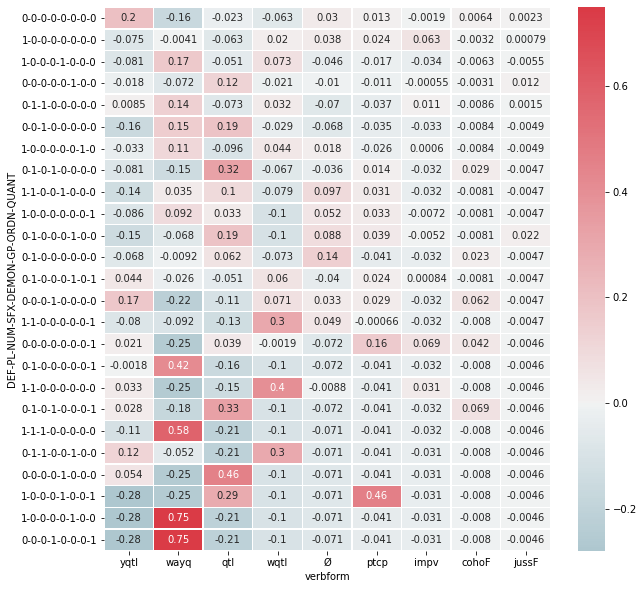

In [50]:
fig, ax = plt.subplots(figsize=(10, 10))
heatmap(verbmod_dp, square=False, annot=True)

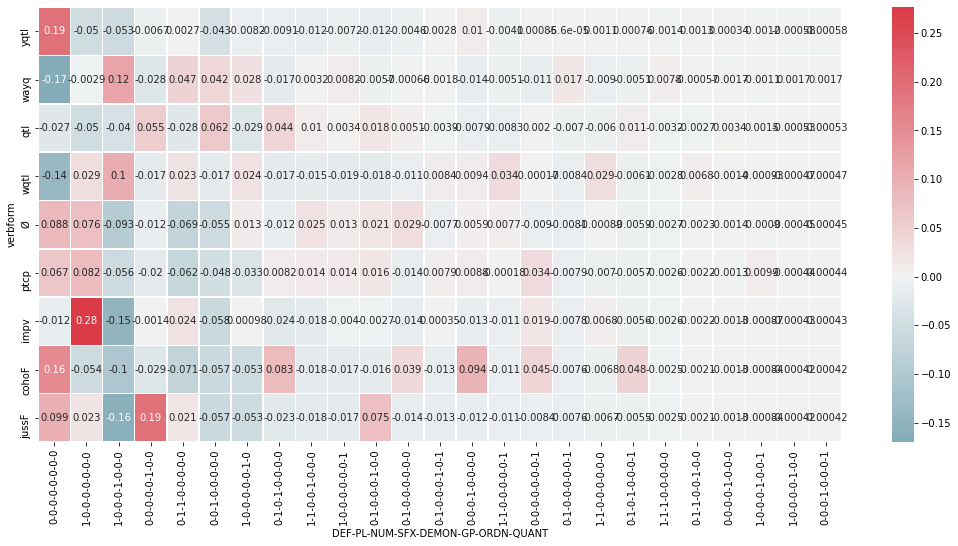

In [51]:
fig, ax = plt.subplots(figsize=(18, 8))
heatmap(verbmod_dp2, square=False, annot=True)